In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

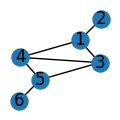

In [157]:
figsize=(1, 1)
fig = plt.figure(figsize=figsize)
G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5), (5, 6)])

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

# Definitions

## Definition 1 - Partition of A

A set $A = A_1,..,A_k$ of disjoint subsets of a set $A$ is a parition of $A$ if $\cup A$ of all sets $A_i$ and $A \neq\emptyset$ for every i.

In [3]:
A = {1, 2, 3, 4, 5, 6} 

A_1 = {1, 2}
A_2 = {3, 4}
A_3 = {5, 6}

A == A_1 | A_2 | A_3

True

## Definition 2 - Vertex set

The set of vertices in a graph denoted by $V(G)$.

Vertex set V(G) = {1, 2, 3, 4, 5, 6}


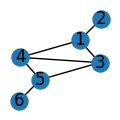

In [4]:
fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

print(f'Vertex set V(G) = {set(G.nodes)}')

## Definition 3 - Edge set

The set of edges in a graph denoted by $E(G)$.

Edge set E(G) = {(1, 2), (1, 3), (4, 5), (5, 6), (1, 4), (3, 4), (3, 5)}


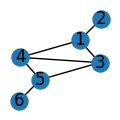

In [5]:
fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)

print(f'Edge set E(G) = {set(G.edges)}')

## Definition 4 - Order

The number of vertices in a graph denoted by $|V|$.

Order |V| = 6


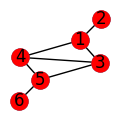

In [6]:
order = G.order()
assert order == len(G.nodes)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=G.nodes, node_size=150, node_color='red')

print(f'Order |V| = {order}')

## Definition 5 - Size

The number of edges in a graph denoted by $|E|$.

Order |V| = 7


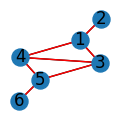

In [7]:
size = G.size()
assert size == len(G.edges)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, edge_color='red')

print(f'Order |V| = {size}')

## Definition 5 - Incident

A vertex $v$ is incident with an edge $e$ if $v \in e$ then $e$ is an edge at $v$. 

Incident edges for v_1  = [(1, 2), (1, 3), (1, 4)]


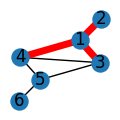

In [8]:
node = 1
incident_edges = G.edges(node)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=incident_edges, edge_color='red', width=5)

print(f'Incident edges for v_{node}  = {incident_edges}')

### Incidence matrix

The incidence matrix is a matrix in which each row of the matrix corresponds to a vertex in the graph, and each column corresponds to an edge. The entry in row i and column j is 1 if vertex i is incident to edge j, and 0 otherwise. In directed graphs, the entries can be either 1, -1 or 0, depending on the direction of the edge.

In [9]:
incidence_matrix = nx.incidence_matrix(G)

assert incidence_matrix.shape[0] == G.order()
assert incidence_matrix.shape[1] == G.size()

print(f'Incident matrix:\n{incidence_matrix.todense()}')

Incident matrix:
[[1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


## Definition 6 - Adjacent

Two vertices $x$,$y$ of $G$ are adjacent if $xy$ is is an edge of $G$.

Adjacent edges for v_1  = [(1, 2), (1, 3), (1, 4)]


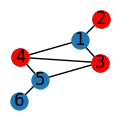

In [10]:
node = 1
adjacent_nodes = list(G.adj[node].keys())

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=adjacent_nodes, node_size=150, node_color='red')

# Check if vertices 1, 3 are adjacent.
assert G.has_edge(1, 3)
# Check if vertices 1, 6 are not adjacent.
assert G.has_edge(1, 6) == False

print(f'Adjacent edges for v_{node}  = {incident_edges}')

### Adjacency matrix

An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

In [11]:
print(f'Adjency matrix:\n{nx.adjacency_matrix(G).todense()}')

Adjency matrix:
[[0 1 1 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 1 1 0]
 [1 0 1 0 1 0]
 [0 0 1 1 0 1]
 [0 0 0 0 1 0]]


## Definition 7 - Complete

If all vertices of G are pairwise adjacent thet $G$ is complete.

Adjency matrix:
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


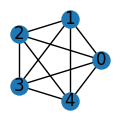

In [19]:
# Generate complete graph K
order = 5
K = nx.complete_graph(order)

fig = plt.figure(figsize=figsize)
nx.draw(K, pos=nx.kamada_kawai_layout(K), node_size=150, with_labels=True)

print(f'Adjency matrix:\n{nx.adjacency_matrix(K).todense()}')

### Examples of completed graphs

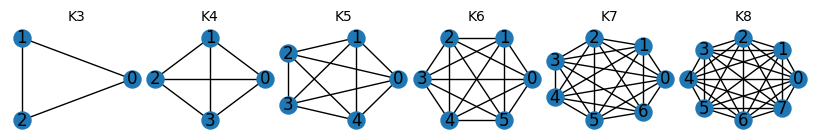

In [39]:
fig, axis = plt.subplots(nrows=1, ncols=6, figsize=(8, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i, order in enumerate(range(3, 9)):
    axis[i].set_title((f'K{order}'), fontdict={'fontsize': 10})

    K = nx.complete_graph(order)
    ax = nx.draw(K, pos=nx.kamada_kawai_layout(K), node_size=150, with_labels=True, ax=axis[i])

## Defintion 8 - Independent

A set of vertices or edges is independent if no two of its elements are adjacent. 

### Node independent

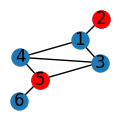

In [40]:
assert G.has_edge(2, 5) == False

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=[2, 5], node_size=150, node_color='red');

### Edge independent

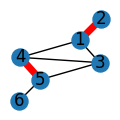

In [41]:
assert (4, 5) not in G.edges(1)

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=[(4, 5), (1, 2)], edge_color='red', width=5);

## Definition 9 - Isomorphic 

We call $G$ and $H$ isomorphic and write $G \simeq H$ if there exists a bijections $\phi: V \to V^{\prime}$ with $xy \in E \Longleftrightarrow \phi(x)\phi(y) \in E^{\prime}$ for all $x,y$ in $V$. 

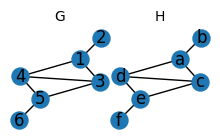

In [55]:
relabel_nodes = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f'}

H = nx.relabel_nodes(G, mapping=relabel_nodes)

assert nx.is_isomorphic(G, H) == True


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
axis[0].set_title((f'G'), fontdict={'fontsize': 10})
axis[1].set_title((f'H'), fontdict={'fontsize': 10})
nx.draw(G, pos=pos, node_size=150, with_labels=True, ax=axis[0])
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True, ax=axis[1])

## Definition 10 - Property

A graph property $Π$ is a class of graphs that is closed under graph isomorphisms. That is, if two graphs $G1$ and $G2$ are isomorphic, both belong to $Π$ or both don’t. 

Examples: connected graphs, trees, planar graphs, regular graphs

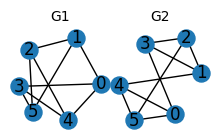

In [89]:
G1 = nx.random_regular_graph(3, 6, seed=42)
G2 = nx.random_regular_graph(3, 6, seed=24)

assert nx.is_isomorphic(G1, G2) == True
assert nx.is_regular(G1) == nx.is_regular(H)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
axis[0].set_title((f'G1'), fontdict={'fontsize': 10})
axis[1].set_title((f'G2'), fontdict={'fontsize': 10})
nx.draw(G1, pos=nx.kamada_kawai_layout(G1), node_size=150, with_labels=True, ax=axis[0])
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_size=150, with_labels=True, ax=axis[1])

## Defintion 11 - Invariant

A map taking graph as arguments is called a graph invariant if it assign equal values to isomorphic graphs.

A graph invariant is a property or a quantity associated with a graph that remains unchanged even if the graph undergoes certain transformations, such as relabeling of nodes or edges, or graph isomorphisms. 

In [90]:
G1 = nx.random_regular_graph(3, 6, seed=42)
G2 = nx.random_regular_graph(3, 6, seed=24)

assert nx.diameter(G1) == nx.diameter(G2) 
assert G1.number_of_edges() == G2.number_of_edges()
assert G1.number_of_nodes() == G2.number_of_nodes()

G_degree_sequence = [d for n, d in G1.degree()]
H_degree_sequence = [d for n, d in G2.degree()]

assert G_degree_sequence == H_degree_sequence 

## Defintion 12 - Induced

If $G\subseteq G^{\prime}$ and $G^{\prime}$ contains all the edges $xy \subseteq E$ with $x, y \subseteq V^{\prime}$ then $G^{\prime}$ is an inducted subgraph og $G$. We stay that $V^{\prime}$ induces $G^{\prime}$ in $G$.

E(H) = {(1, 3), (4, 5), (1, 4), (3, 4), (3, 5)}
E(G) = {(1, 2), (1, 3), (4, 5), (5, 6), (1, 4), (3, 4), (3, 5)}


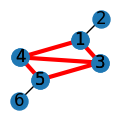

In [194]:
H = nx.induced_subgraph(G, [1, 3, 4, 5])

assert set(H.edges).issubset(G.edges)
assert set(H.nodes).issubset(G.nodes)
print(f'E(H) = {set(H.edges)}')
print(f'E(G) = {set(G.edges)}')

fig = plt.figure(figsize=figsize)
nx.draw(H, pos=pos, node_size=150, with_labels=True)

nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, edgelist=H.edges, edge_color='red', width=3);

## Definition 13 - Spanning

$G^{\prime}$ is a spanning subgraph of G if $V^{\prime}$ spans all of $G$ or $V^{\prime} = V$. 

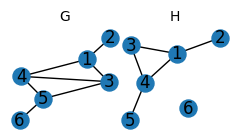

In [178]:
random_edges = np.random.choice(len(list(G.edges))-1, size=5, replace=False).tolist()
random_edges = [list(G.edges)[i] for i in random_edges]

H = nx.Graph()
H.add_nodes_from(G.nodes)
H.add_edges_from(random_edges)

assert G.nodes == H.nodes 

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(2, 1), )
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
axis[0].set_title((f'G'), fontdict={'fontsize': 10})
axis[1].set_title((f'H'), fontdict={'fontsize': 10})
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=150, with_labels=True, ax=axis[0])
nx.draw(H, pos=nx.kamada_kawai_layout(H), node_size=150, with_labels=True, ax=axis[1])

## Definition 14 - Line Graph

The line graph $L(G)$ of $G$ is the graph of $E$ in which $x,y \in E$ are adjacent as vertices if and only if they are adjacent as edges in $G$. 

V(L) = {(1, 2), (1, 3), (5, 6), (4, 5), (1, 4), (3, 4), (3, 5)}


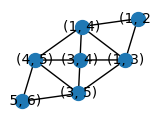

In [199]:
L = nx.line_graph(G)

print(f'V(L) = {set(L.nodes)}')

fig = plt.figure(figsize=(1.4, 1))
nx.draw(L, pos=nx.kamada_kawai_layout(L), node_size=100, with_labels=True,font_size=10)

## Definition 15 - Neighbors $N_{G}(v_i)$

The set of neighbors of a vertex v.

Neighbors for vertex 1 = {2, 3, 4}


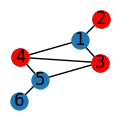

In [209]:
vertex = 1
neighbors = set(nx.neighbors(G, vertex))
print(f'Neighbors for vertex {vertex} = {neighbors}')

fig = plt.figure(figsize=figsize)
nx.draw(G, pos=pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=neighbors, node_size=150, node_color='red');

## Definition 16 - Degree

The degree $d(V)$ of vertex $v$ is the number $|E(v)|$ of edges at v or number of neighbors of $v$.

In [214]:
vertex = 1
assert nx.degree(G, vertex) == len(set(nx.neighbors(G, vertex)))

## Definition 17 - Isolated

A vertex of degree $0$ is isolated.

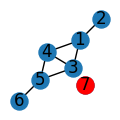

In [221]:
H = G.copy()
H.add_node(7)  # Vertex 7 is isolated.

assert nx.degree(H, 7) == 0

fig = plt.figure(figsize=figsize)
new_pos = pos=nx.kamada_kawai_layout(H)
nx.draw(H, pos=new_pos, node_size=150, with_labels=True)
nx.draw_networkx_nodes(new_pos, pos=pos, nodelist=[7], node_size=150, node_color='red');

# IN PROGRESS